<a href="https://colab.research.google.com/github/TangNgheQuangHuy/TangNgheQuangHuy-20146255-fuzzylogic/blob/main/Do_am_khong_khi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=ae3d7b52da1386b6618a86b42d1706be396924c6169920362ce97701de1696ea
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


160.82999664311689


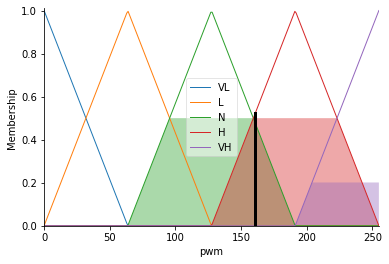

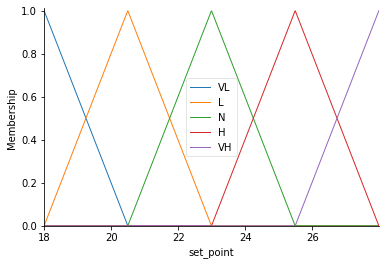

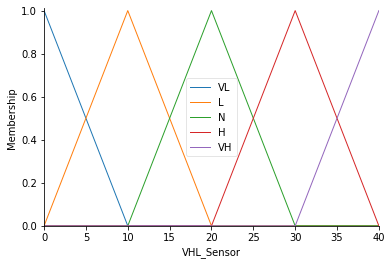

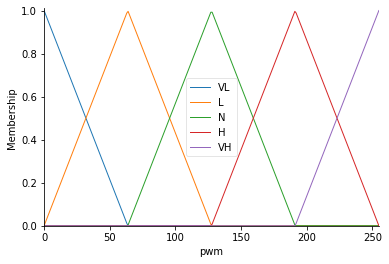

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
set_point = ctrl.Antecedent(np.arange(18,28,0.01), 'set_point')
VHL_Sensor = ctrl.Antecedent(np.arange(0,41,1), 'VHL_Sensor')
pwm = ctrl.Consequent(np.arange(0,256,1), 'pwm')
Valuex = ['VL', 'L', 'N', 'H', 'VH']
set_point.automf(names=Valuex)
VHL_Sensor.automf(names=Valuex)
pwm.automf(names=Valuex)

rule1 = ctrl.Rule(set_point['VL']& VHL_Sensor['VL'],pwm['VL'])
rule2 = ctrl.Rule(set_point['L']& VHL_Sensor['VL'],pwm['VL'])
rule3 = ctrl.Rule(set_point['N']& VHL_Sensor['VL'],pwm['VL'])
rule4 = ctrl.Rule(set_point['H']& VHL_Sensor['VL'],pwm['L'])
rule5 = ctrl.Rule(set_point['VH']& VHL_Sensor['VL'],pwm['L'])

rule6 = ctrl.Rule(set_point['VL']& VHL_Sensor['L'],pwm['VL'])
rule7 = ctrl.Rule(set_point['L']& VHL_Sensor['L'],pwm['VL'])
rule8 = ctrl.Rule(set_point['N']& VHL_Sensor['L'],pwm['L'])
rule9 = ctrl.Rule(set_point['H']& VHL_Sensor['L'],pwm['L'])
rule10 = ctrl.Rule(set_point['VH']& VHL_Sensor['L'],pwm['N'])

rule11 = ctrl.Rule(set_point['VL']& VHL_Sensor['N'],pwm['L'])
rule12 = ctrl.Rule(set_point['L']& VHL_Sensor['N'],pwm['L'])
rule13 = ctrl.Rule(set_point['N']& VHL_Sensor['N'],pwm['N'])
rule14 = ctrl.Rule(set_point['H']& VHL_Sensor['N'],pwm['N'])
rule15 = ctrl.Rule(set_point['VH']& VHL_Sensor['N'],pwm['H'])

rule16 = ctrl.Rule(set_point['VL']& VHL_Sensor['H'],pwm['N'])
rule17 = ctrl.Rule(set_point['L']& VHL_Sensor['H'],pwm['N'])
rule18 = ctrl.Rule(set_point['N']& VHL_Sensor['H'],pwm['H'])
rule19 = ctrl.Rule(set_point['H']& VHL_Sensor['H'],pwm['H'])
rule20 = ctrl.Rule(set_point['VH']& VHL_Sensor['H'],pwm['VL'])

rule21 = ctrl.Rule(set_point['VL']& VHL_Sensor['VH'],pwm['H'])
rule22 = ctrl.Rule(set_point['L']& VHL_Sensor['VH'],pwm['H'])
rule23 = ctrl.Rule(set_point['N']& VHL_Sensor['VH'],pwm['VH'])
rule24 = ctrl.Rule(set_point['H']& VHL_Sensor['VH'],pwm['VH'])
rule25 = ctrl.Rule(set_point['VH']& VHL_Sensor['VH'],pwm['VH'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['set_point'] = 21
powering.input['VHL_Sensor'] = 35
powering.compute()
print(powering.output['pwm'])
pwm.view(sim = powering)

set_point.view()
VHL_Sensor.view()
pwm.view()
